<a href="https://colab.research.google.com/github/AsadillahRamadhan/PCVK/blob/main/Pertemuan10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import matplotlib.patches as patches

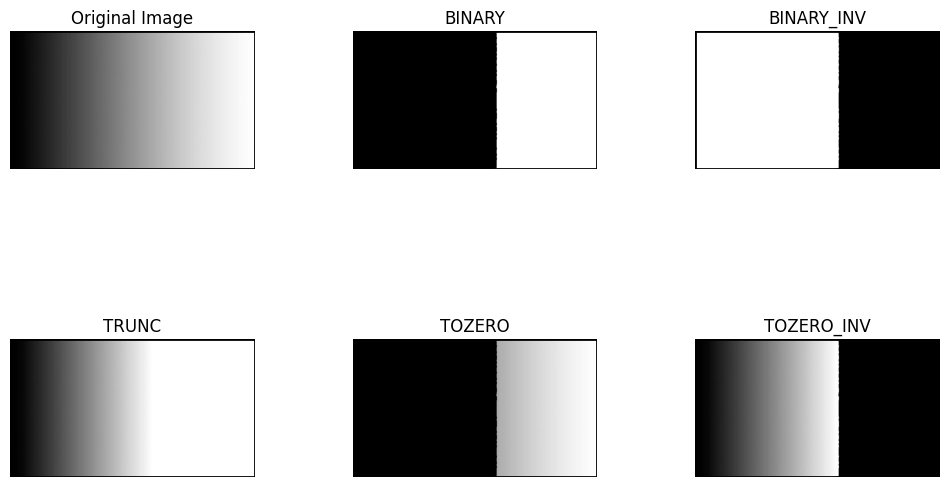

In [27]:
# 3 (Global Threshold)
image_3 = []

for i in range(6):
  image_3.append(cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/gradient.jpg', 0))

threshold = 170

title = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']

# Binary Threshold dan Inverted
maxVal = 0
for x in range (image_3[1].shape[0]):
  for y in range (image_3[1].shape[1]):
    if(image_3[1][x,y] > maxVal):
      maxVal = image_3[1][x,y]

for x in range (image_3[1].shape[0]):
  for y in range (image_3[1].shape[1]):
    if(image_3[1][x,y] > threshold):
      image_3[1][x,y] = maxVal
      image_3[2][x,y] = 0
    else:
      image_3[1][x,y] = 0
      image_3[2][x,y] = maxVal

# Truncate Threshold
for x in range (image_3[3].shape[0]):
  for y in range (image_3[3].shape[1]):
    if(image_3[3][x,y] > threshold):
      image_3[3][x,y] = threshold

# Threshold To Zero dan Inverted
for x in range (image_3[4].shape[0]):
  for y in range (image_3[4].shape[1]):
    if(image_3[4][x,y] > threshold):
      image_3[5][x,y] = 0
    else:
      image_3[4][x,y] = 0

# Menampilkan Plot
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
plt.subplots_adjust(wspace=0.4, hspace=0)
idx = 0
for i in range(2):
  for j in range(3):
    axes[i, j].imshow(image_3[idx], cmap='gray')
    axes[i, j].axis('off')
    axes[i, j].set_title(title[idx])
    rect = patches.Rectangle((0, 0), image_3[idx].shape[1], image_3[idx].shape[0], linewidth=2, edgecolor='black', facecolor='none')
    axes[i, j].add_patch(rect)
    idx += 1

plt.show()

In [73]:
# 4 (Otsu Thresholding)
image_4 = []

for i in range(3):
  image_4.append(cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/balloon.jpg', 0))

threshold = 90
temp = 0

# Binary Threshold Awal
maxVal = 0
for x in range (image_4[1].shape[0]):
  for y in range (image_4[1].shape[1]):
    if(image_4[1][x,y] > maxVal):
      maxVal = image_4[1][x,y]

for x in range (image_4[1].shape[0]):
  for y in range (image_4[1].shape[1]):
    if(image_4[1][x,y] > threshold):
      image_4[1][x,y] = maxVal
    else:
      image_4[1][x,y] = 0

hist = cv.calcHist([image_4[0]], [0], None, [256], [0, 256])
luas = image_4[0].shape[0] * image_4[0].shape[1]

for i in range(256):
  wb = np.sum(hist[0:i]) / luas
  wf = np.sum(hist[i+1:255]) / luas
  mb, mf = 0, 0

  for j in range(i):
    mb += i * hist[j]

  for j in range(256-i):
    mf += i * hist[i + j]

  mb /= np.sum(hist[0:i])
  mf /= np.sum(hist[i+1:255])

  vb, vf = 0, 0
  for j in range(i+1):
    vb += (pow((i - mb), 2) * hist[j])

  for j in range(256-i):
    vf += (pow((i - mf), 2) * hist[i + j])

  vb /= np.sum(hist[0:i])
  vf /= np.sum(hist[i+1:255])

  wcf = wb * vb - wf * vf

  if(wcf > temp):
    threshold = i
    temp = wcf

# Binary Threshold (Setelah Otsu's)
maxVal = 0
for x in range (image_4[2].shape[0]):
  for y in range (image_4[2].shape[1]):
    if(image_4[2][x,y] > maxVal):
      maxVal = image_4[2][x,y]

for x in range (image_4[2].shape[0]):
  for y in range (image_4[2].shape[1]):
    if(image_4[2][x,y] > threshold):
      image_4[2][x,y] = maxVal
    else:
      image_4[2][x,y] = 0


title = ['Citra Asli', 'Global Thresholding (v = 90)', f"Otsu's Thresholding (v = {threshold})"]

fig, axes = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(wspace=0.4, hspace=0)
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.imshow(image_4[i], cmap="gray")
  plt.title(title[i])
  plt.axis('off')

plt.show()

IndexError: ignored

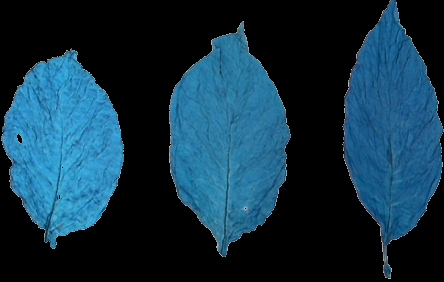

In [90]:
# 5 (Histogram Dari Citra Tersegmentasi)
image_5 = []
title = ['Citra Asli', 'Citra Segment', '']

for i in range(2):
  image_5.append(cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/tobacco.jpg'))
  image_5[i] = cv.cvtColor(image_5[i], cv.COLOR_BGR2RGB)

image_5[1] = cv.cvtColor(image_5[1], cv.COLOR_RGB2GRAY)
hist = cv.calcHist([image_5[0]], [0], None, [256], [0, 256])

_, thresh = cv.threshold(image_5[1], 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
contours, _ = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
mask = np.zeros_like(image_5[0])

# Draw the contours on the mask
cv.drawContours(mask, contours, -1, (255, 255, 255), -1)

# Apply the mask to the image
masked_image = cv.bitwise_and(image_5[0], mask)
cv2_imshow(masked_image)
# fig, axes = plt.subplots(figsize=(12, 8))
# for i in range(3):
#   plt.subplot(1, 3, i+1)
#   plt.imshow(image_5[i])
#   plt.title(title[i])
#   plt.axis('off')




<ipython-input-49-ccddd101ef2e>:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i+1)


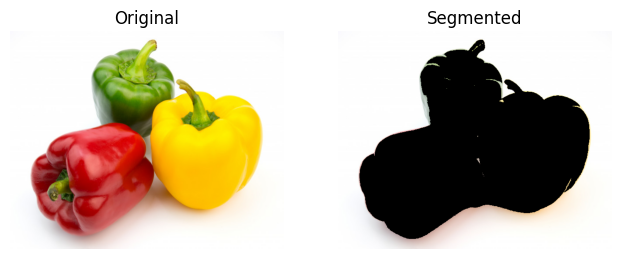

In [49]:
# 6 (Segmentasi Warna Menggunakan K-Means)
image_6 = []
for i in range(2):
  image_6.append(cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/peppers.jpg'))
  image_6[i] = cv.cvtColor(image_6[i], cv.COLOR_BGR2RGB)

pixel_values = image_6[0].reshape((-1, 3))
k = 3  # Jumlah cluster
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
attempts = 10
_, labels, centers = cv.kmeans(pixel_values.astype(np.float32), k, None, criteria, attempts, cv.KMEANS_RANDOM_CENTERS)

# Pilih kelompok yang mewakili warna kuning (misalnya, berdasarkan nilai Hue dalam saluran HSV)
yellow_cluster = np.argmax(centers[:, 0])  # Cari cluster dengan nilai Hue terbesar

# Buat mask yang hanya berisi piksel dalam kelompok warna kuning
mask = (labels == yellow_cluster).reshape(image_6[0].shape[:2])

# Terapkan mask pada citra asli untuk menampilkan hanya warna kuning
yellow_pixels = np.zeros_like(image_6[0])
yellow_pixels[mask] = image_6[0][mask]
title = ['Original', 'Segmented']
image_6[1] = np.copy(yellow_pixels)
fig, axes = plt.subplots(figsize=(12, 8))
for i in range(2):
  plt.subplot(1, 3, i+1)
  plt.imshow(image_6[i])
  plt.title(title[i])
  plt.axis('off')

<ipython-input-82-4aaaff745fb2>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i+1)


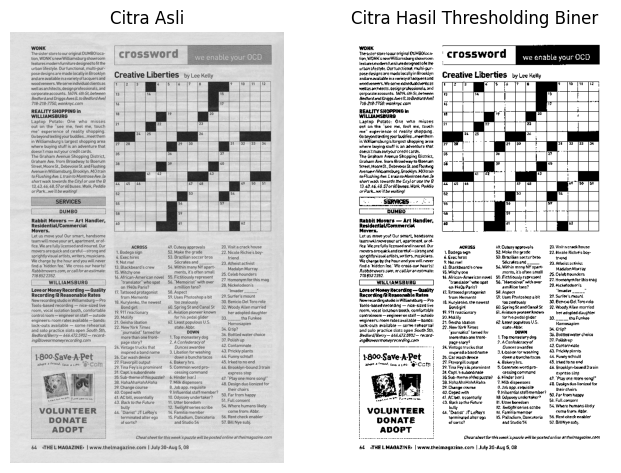

In [82]:
# 7 (Thresholding Biner Dengan Hasil Terbaik)
image_7 = []
for i in range(2):
  image_7.append(cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/crossword.jpg', 0))

_, image_7[1] = cv.threshold(image_7[1],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

title = ['Citra Asli', 'Citra Hasil Thresholding Biner']
fig, axes = plt.subplots(figsize=(12, 8))
for i in range(2):
  plt.subplot(1, 3, i+1)
  plt.imshow(image_7[i], cmap='gray')
  plt.title(title[i])
  plt.axis('off')